In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset (automatically downloads to kagglehub cache on disk)
dataset_path = kagglehub.dataset_download("bertnardomariouskono/cardiovascular-disease-risk-prediction-dataset")

#Print the location of the dataset
print(f"Data cached at: {dataset_path}")

# Load the CSV file
df = pd.read_csv(f"{dataset_path}/healthcare_synthetic_data.csv")

c:\Users\LT-MSI\.conda\envs\ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data cached at: C:\Users\LT-MSI\.cache\kagglehub\datasets\bertnardomariouskono\cardiovascular-disease-risk-prediction-dataset\versions\1


# Prétraitement

Étapes à faire : 
- Type des variables
- Data cleaning :
    - Duplication
    - NaN
    - Variable constante
    - Outliers

In [2]:
df.head()

Patient_ID  Age  Gender  Height_cm  Weight_kg   BMI  Systolic_BP  \
0  PID-00001   60       0      146.9       51.3  23.8          140   
1  PID-00002   53       0      161.8       76.6  29.3          128   
2  PID-00003   62       1      174.7       92.4  30.3          141   
3  PID-00004   73       1      173.3       68.9  22.9          136   
4  PID-00005   52       1      178.6       79.8  25.0          122   

   Diastolic_BP  Cholesterol_Total  Cholesterol_LDL  Cholesterol_HDL  \
0            89                217              151               52   
1            81                203              119               38   
2           100                173              124               45   
3            96                193              117               45   
4            80                236              153               41   

   Fasting_Blood_Sugar  Smoking_Status  Alcohol_Consumption  \
0                   83               0                    1   
1                  116               0                    0   
2                   90               0                    0   
3                   81               0                    0   
4                   79               0                    1   

   Physical_Activity_Level  Family_History  Stress_Level  Sleep_Hours  \
0                        3               0             1            8   
1                        1               0             7            9   
2                        0               0             1            7   
3                        1               0             2            7   
4                        2               0             2            6   

   Heart_Disease_Risk  
0                   0  
1                   0  
2                   1  
3                   1  
4                   0

## Type des variables

In [4]:
df.dtypes

Patient_ID                     str
Age                          int64
Gender                       int64
Height_cm                  float64
Weight_kg                  float64
BMI                        float64
Systolic_BP                  int64
Diastolic_BP                 int64
Cholesterol_Total            int64
Cholesterol_LDL              int64
Cholesterol_HDL              int64
Fasting_Blood_Sugar          int64
Smoking_Status               int64
Alcohol_Consumption          int64
Physical_Activity_Level      int64
Family_History               int64
Stress_Level                 int64
Sleep_Hours                  int64
Heart_Disease_Risk           int64
dtype: object

**Commentaires** : Quelques variabels sont quantitatives, donc il faut changer leurs types.

In [6]:
df["Gender"] = pd.Categorical(df["Gender"], ordered=False)
df["Smoking_Status"] = pd.Categorical(df["Smoking_Status"], ordered=False)
df["Physical_Activity_Level"] = pd.Categorical(df["Physical_Activity_Level"], ordered=True) #orders à vérifier
df["Alcohol_Consumption"] = pd.Categorical(df["Alcohol_Consumption"], ordered=True)
df["Family_History"] = pd.Categorical(df["Family_History"], ordered=False)
df["Heart_Disease_Risk"] = pd.Categorical(df["Heart_Disease_Risk"], ordered=False)

In [7]:
df.describe()

Age     Height_cm     Weight_kg           BMI   Systolic_BP  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      54.538133    165.336767     75.252573     27.446080    135.117667   
std       11.875294      9.186313     14.110559      4.134953     11.260634   
min       25.000000    138.500000     33.700000     14.500000     90.000000   
25%       46.000000    158.500000     65.200000     24.500000    127.000000   
50%       55.000000    164.700000     73.900000     27.200000    135.000000   
75%       63.000000    172.000000     83.900000     30.000000    143.000000   
max       85.000000    198.100000    150.100000     46.100000    182.000000   

       Diastolic_BP  Cholesterol_Total  Cholesterol_LDL  Cholesterol_HDL  \
count  15000.000000       15000.000000     15000.000000     15000.000000   
mean      90.541267         216.248000       140.355267        43.307867   
std        8.443095          22.692222        17.914089         5.963153   
min       60.000000         127.000000        70.000000        20.000000   
25%       85.000000         201.000000       128.000000        39.000000   
50%       91.000000         216.000000       140.000000        43.000000   
75%       96.000000         231.000000       152.000000        47.000000   
max      120.000000         303.000000       210.000000        68.000000   

       Fasting_Blood_Sugar  Stress_Level   Sleep_Hours  
count         15000.000000  15000.000000  15000.000000  
mean             99.670200      5.503667      6.506067  
std              15.261355      2.874277      1.212626  
min              60.000000      1.000000      4.000000  
25%              89.000000      3.000000      6.000000  
50%              99.000000      5.500000      7.000000  
75%             110.000000      8.000000      7.000000  
max             167.000000     10.000000     10.000000

## data cleaning

In [8]:
n_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {n_duplicated}\n")

dff = pd.DataFrame({
    'n_unique':df.nunique(),
    'n_missing':df.isna().sum(),
    'missing_ratio':df.isna().mean(),
    'dtype':df.dtypes.values
})

print(dff)

Number of duplicated rows: 0

                         n_unique  n_missing  missing_ratio     dtype
Patient_ID                  15000          0            0.0       str
Age                            61          0            0.0     int64
Gender                          2          0            0.0  category
Height_cm                     516          0            0.0   float64
Weight_kg                     817          0            0.0   float64
BMI                           274          0            0.0   float64
Systolic_BP                    82          0            0.0     int64
Diastolic_BP                   61          0            0.0     int64
Cholesterol_Total             161          0            0.0     int64
Cholesterol_LDL               132          0            0.0     int64
Cholesterol_HDL                47          0            0.0     int64
Fasting_Blood_Sugar            97          0            0.0     int64
Smoking_Status                  2          0            0.0 

**Commentaire** : pas de données redondantes ou manquantes. 

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns.tolist()
categorical_df = df.select_dtypes(include=['category'])
categorical_cols = categorical_df.columns.tolist()

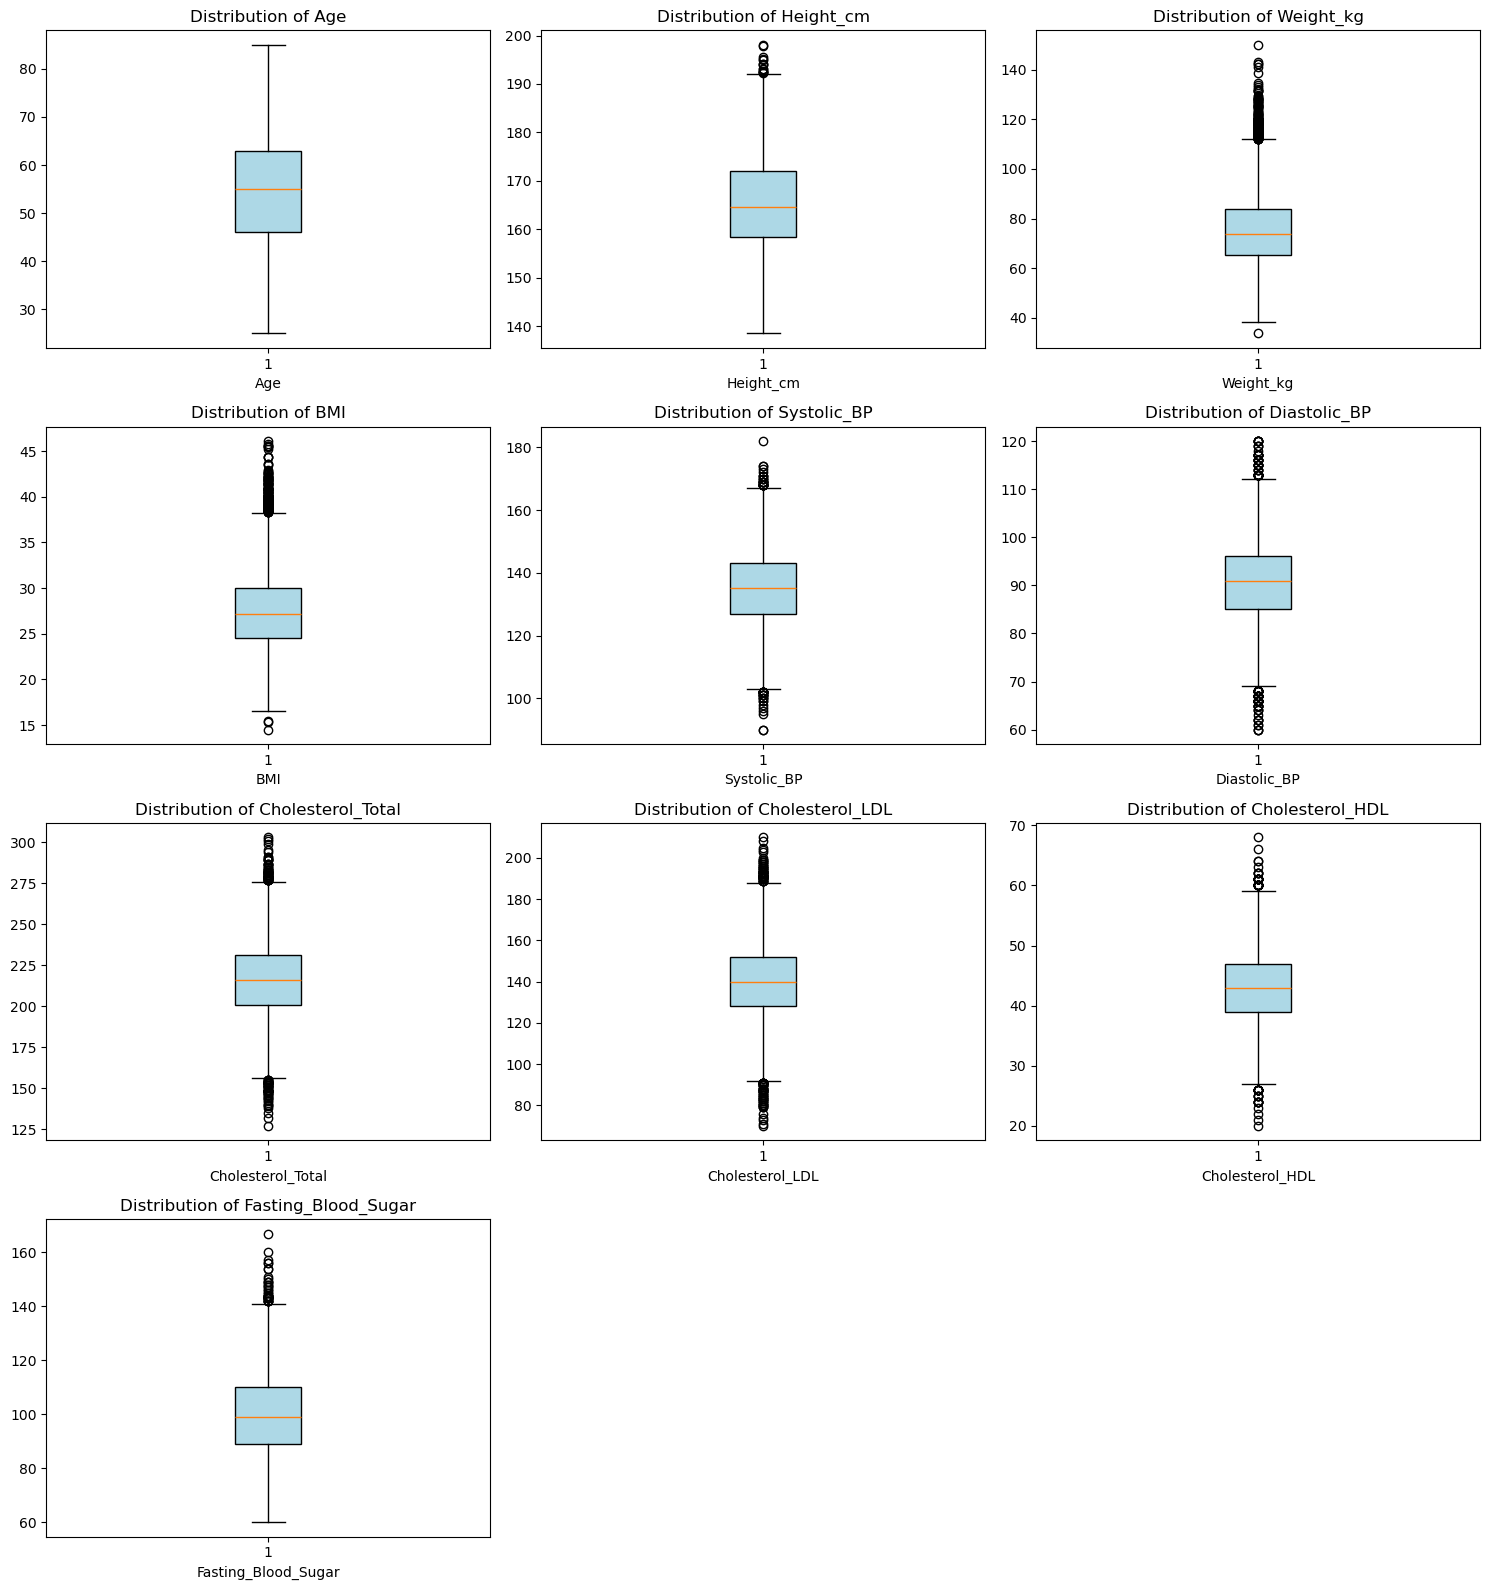

In [23]:
list_cols = numeric_cols[:-2]
n_cols = len(list_cols)

# Create subplots
fig, axes = plt.subplots((n_cols + 2) // 3, 3, figsize=(15, 4 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot histogram with density line for each numeric column
for idx, col in enumerate(list_cols):
    axes[idx].boxplot(numeric_df[col], patch_artist=True, boxprops=dict(facecolor='lightblue', edgecolor='black'))
    
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    #axes[idx].set_ylabel('Density')

# Remove extra subplots
for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

**Commentaire** : Les valeurs extremes (qui dépassent le seuil dans le boxplot) ne sont pas impossibles à observer en réalité. En effet, elles repprésentent les conditions de santé plus extremes, ce qui peut être intéressant pour notre analyse, donc on ne les enlève pas.

# Exploration générale

Quantitatives : 
- Plot des points
- Histogramme + densité : vérifier la normalité des données
- Corrélation

Qualitatives : 
- Barplot : 
    - Comptage
    - Entre 2 variables
- Table de contigence
- 

Qualitatives + Quantitatives

In [24]:
numeric_cols

['Age',
 'Height_cm',
 'Weight_kg',
 'BMI',
 'Systolic_BP',
 'Diastolic_BP',
 'Cholesterol_Total',
 'Cholesterol_LDL',
 'Cholesterol_HDL',
 'Fasting_Blood_Sugar',
 'Stress_Level',
 'Sleep_Hours']

In [26]:
categorical_cols

['Gender',
 'Smoking_Status',
 'Alcohol_Consumption',
 'Physical_Activity_Level',
 'Family_History',
 'Heart_Disease_Risk']

## Scatterplot

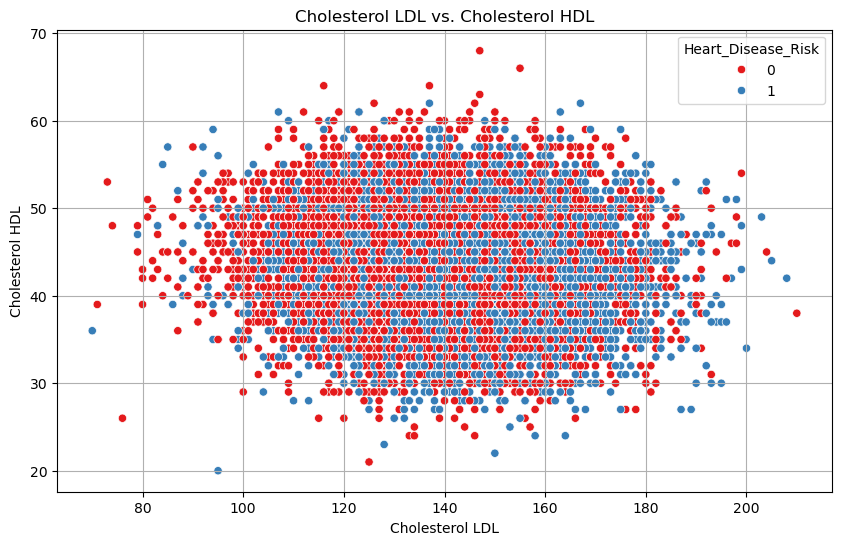

In [37]:
# Boxplot de Cholesterol_LDL vs. Cholesterol_HDL
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="Cholesterol_LDL", y="Cholesterol_HDL", hue="Heart_Disease_Risk", palette="Set1")
plt.xlabel('Cholesterol LDL')
plt.ylabel('Cholesterol HDL')
plt.title('Cholesterol LDL vs. Cholesterol HDL')
plt.grid()
plt.show()

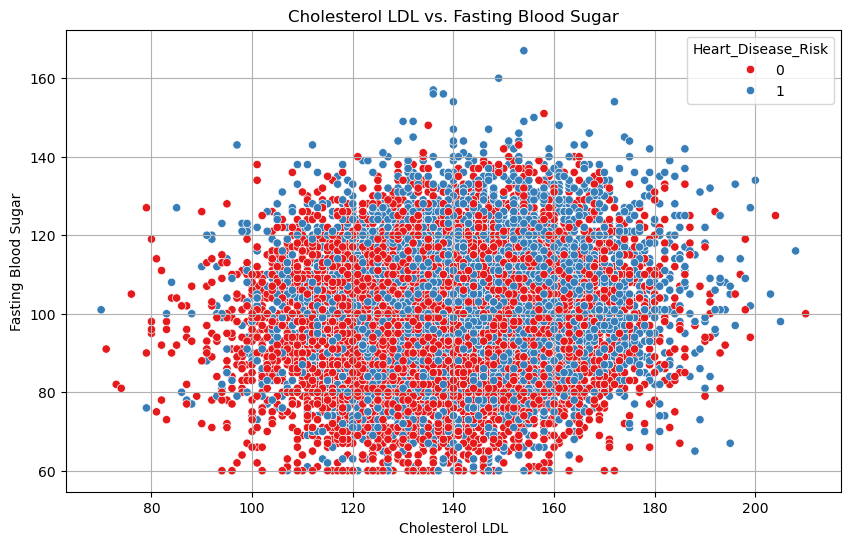

In [38]:
# Scatter plot of Cholesterol_LDL vs. Fasting_Blood_Sugar colored by Heart_Disease_Risk
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="Cholesterol_LDL", y="Fasting_Blood_Sugar", hue="Heart_Disease_Risk", palette="Set1")
plt.xlabel('Cholesterol LDL')
plt.ylabel('Fasting Blood Sugar')
plt.title('Cholesterol LDL vs. Fasting Blood Sugar')
plt.grid()
plt.show()

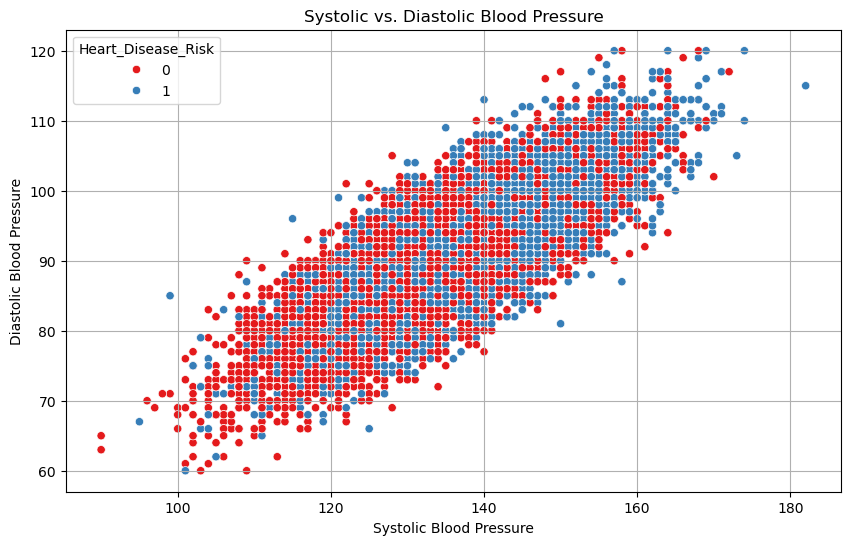

In [39]:
# Scatter plot of Cholesterol_LDL vs. Fasting_Blood_Sugar colored by Heart_Disease_Risk
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="Systolic_BP", y="Diastolic_BP", hue="Heart_Disease_Risk", palette="Set1")
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Systolic vs. Diastolic Blood Pressure')
plt.grid()
plt.show()

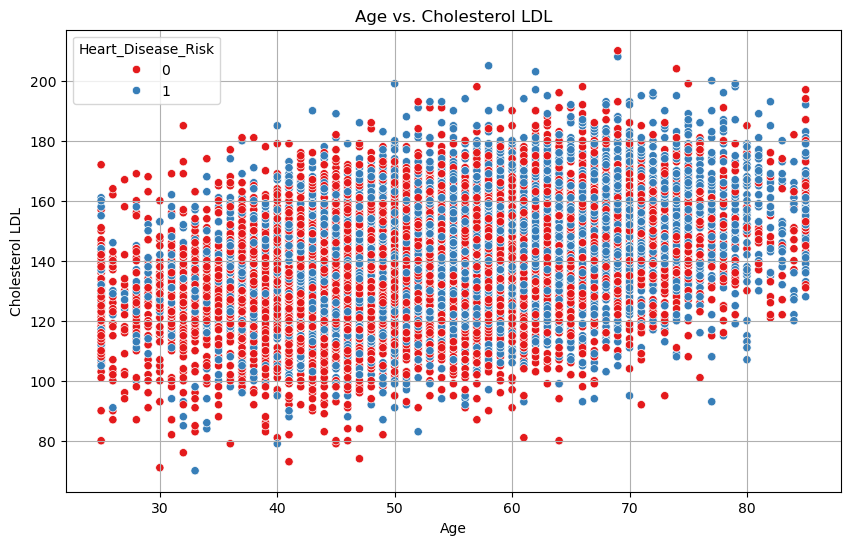

In [50]:
# Scatter plot of Age vs. Cholesterol_LDL colored by Heart_Disease_Risk
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Cholesterol_LDL", hue="Heart_Disease_Risk", palette="Set1")
plt.xlabel('Age')
plt.ylabel('Cholesterol LDL')
plt.title('Age vs. Cholesterol LDL')
plt.grid()
plt.show()

## Densité et histogram des variables quantitatives

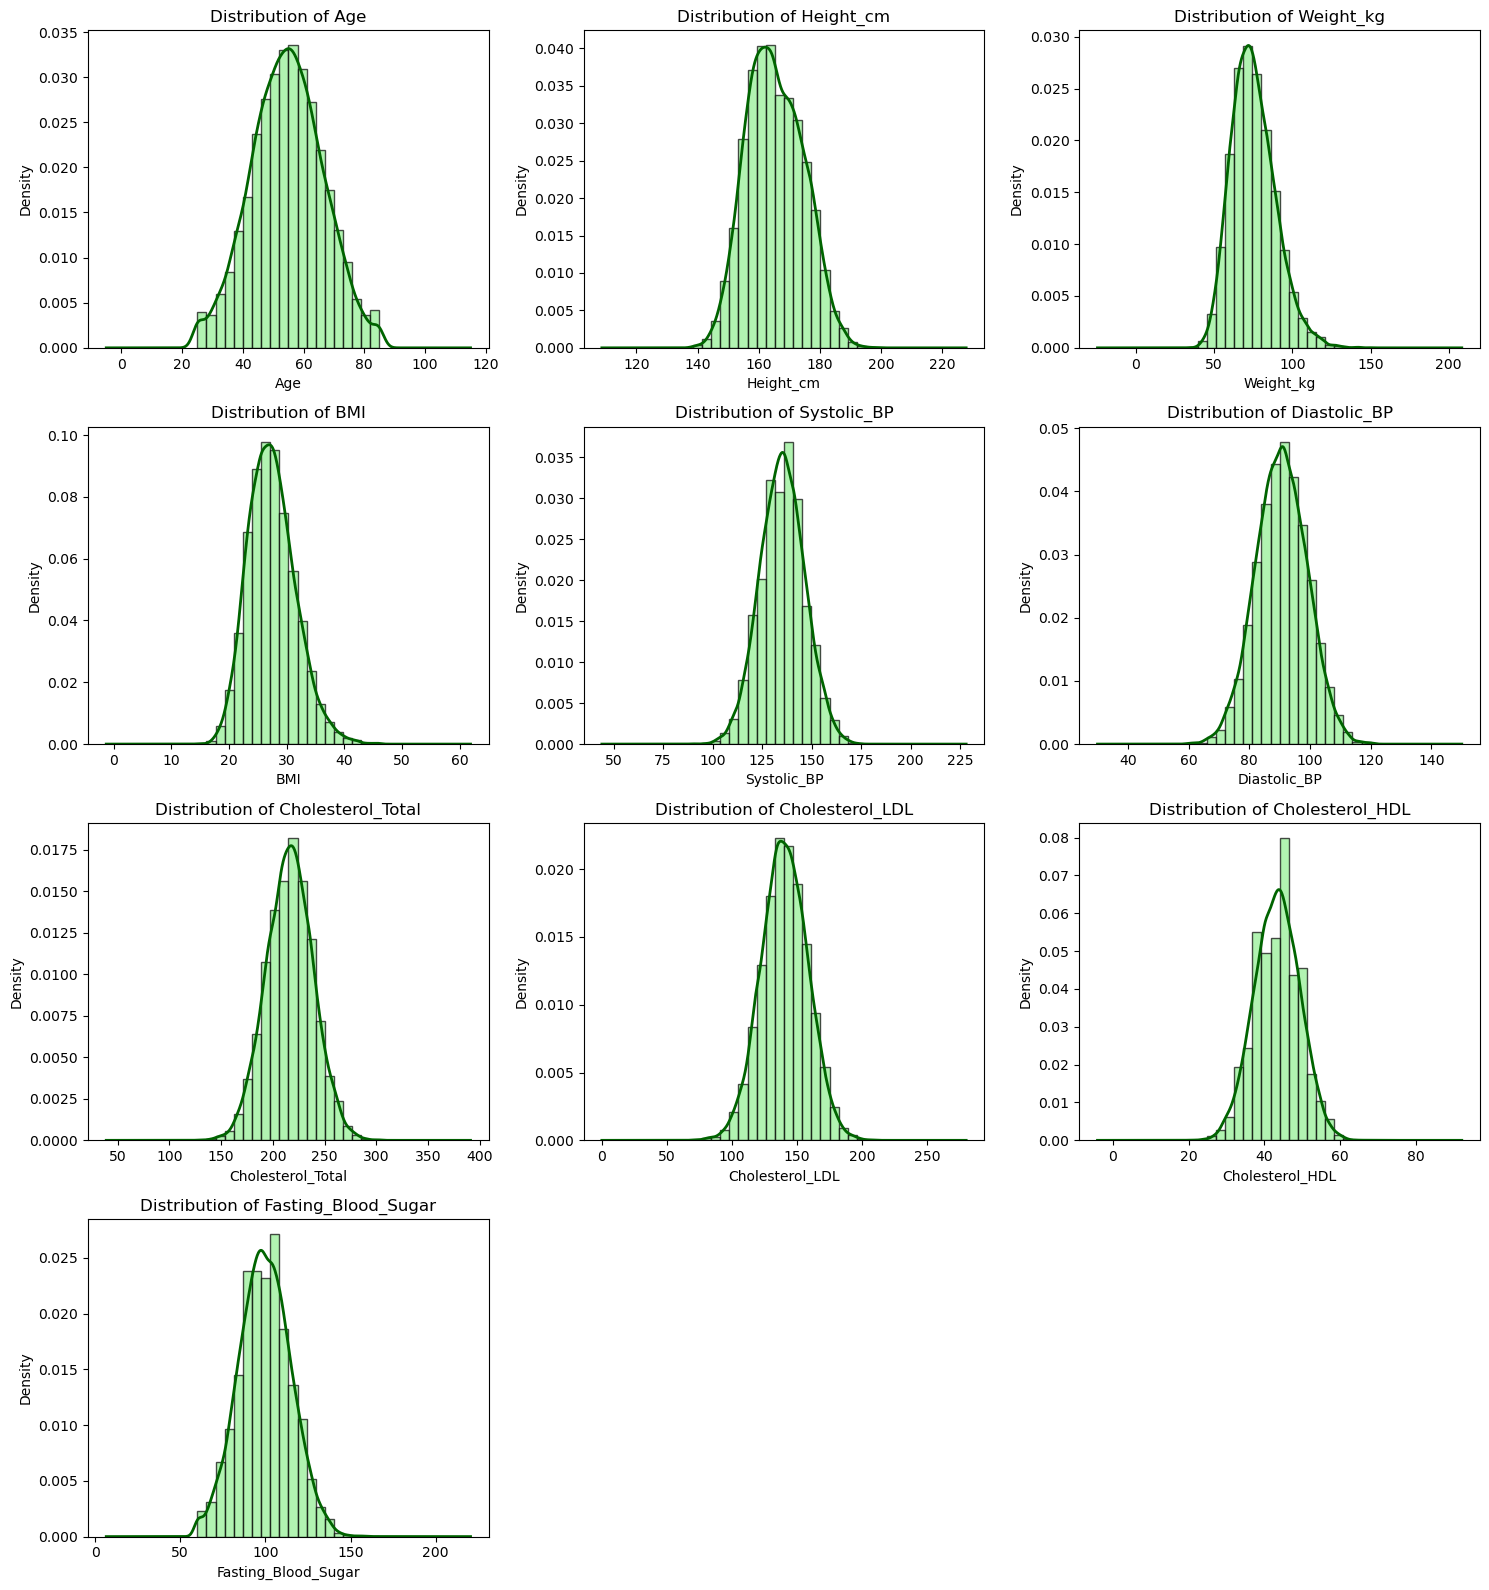

In [41]:
n_cols = len(numeric_cols) -2

# Create subplots
fig, axes = plt.subplots((n_cols + 2) // 3, 3, figsize=(15, 4 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot histogram with density line for each numeric column
for idx, col in enumerate(numeric_cols[:-2]):
    axes[idx].hist(numeric_df[col], bins=20, color='lightgreen', edgecolor='black', density=True, alpha=0.7)
    
    # Add KDE line
    numeric_df[col].plot(kind='kde', ax=axes[idx], color='darkgreen', linewidth=2, secondary_y=False)
    
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')

# Remove extra subplots
for idx in range(n_cols, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import shapiro
list_cols = ['Height_cm', 'Weight_kg', 'BMI']
for col in list_cols:
    stat, p = shapiro(numeric_df[col])
    print(f'Shapiro-Wilk test for {col}: stat={stat:.4f}, p={p}')

Shapiro-Wilk test for Height_cm: stat=0.9941, p=2.982492542903182e-24
Shapiro-Wilk test for Weight_kg: stat=0.9826, p=5.810615044209873e-39
Shapiro-Wilk test for BMI: stat=0.9881, p=2.195296023583449e-33


c:\Users\LT-MSI\.conda\envs\ML\Lib\site-packages\scipy\stats\_axis_nan_policy.py:592: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


**Commentaire** : Les données sont assez 'gaussiennes', donc on ne fait pas des transformations.

## Corrélation

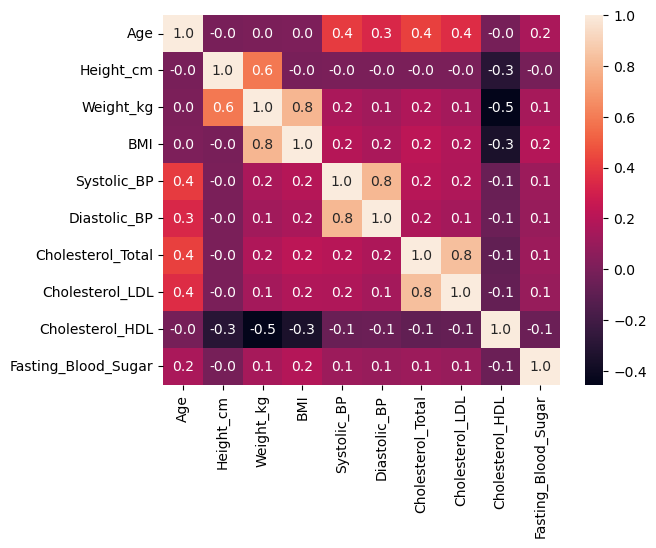

In [49]:
sns.heatmap(numeric_df.iloc[:, :-2].corr(), annot=True, fmt='.1f')
plt.show()

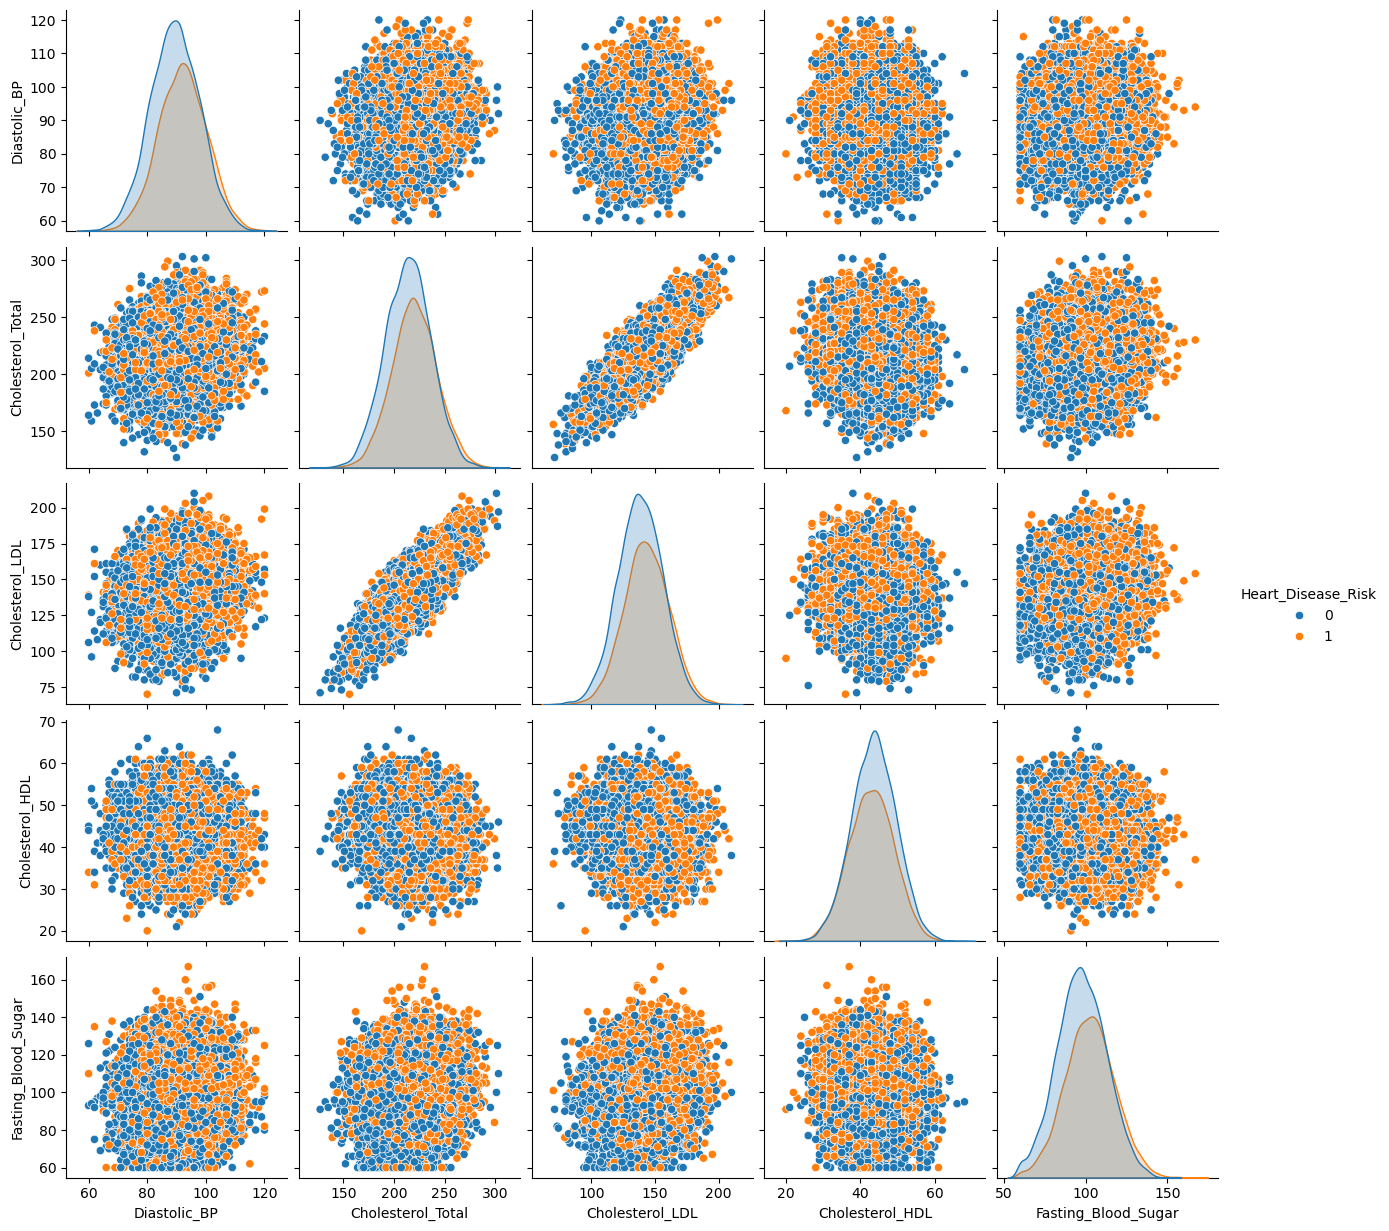

In [ ]:
list_cols = numeric_cols[5:10] + ['Heart_Disease_Risk']
sns.pairplot(df[list_cols], hue = 'Heart_Disease_Risk')
plt.show()

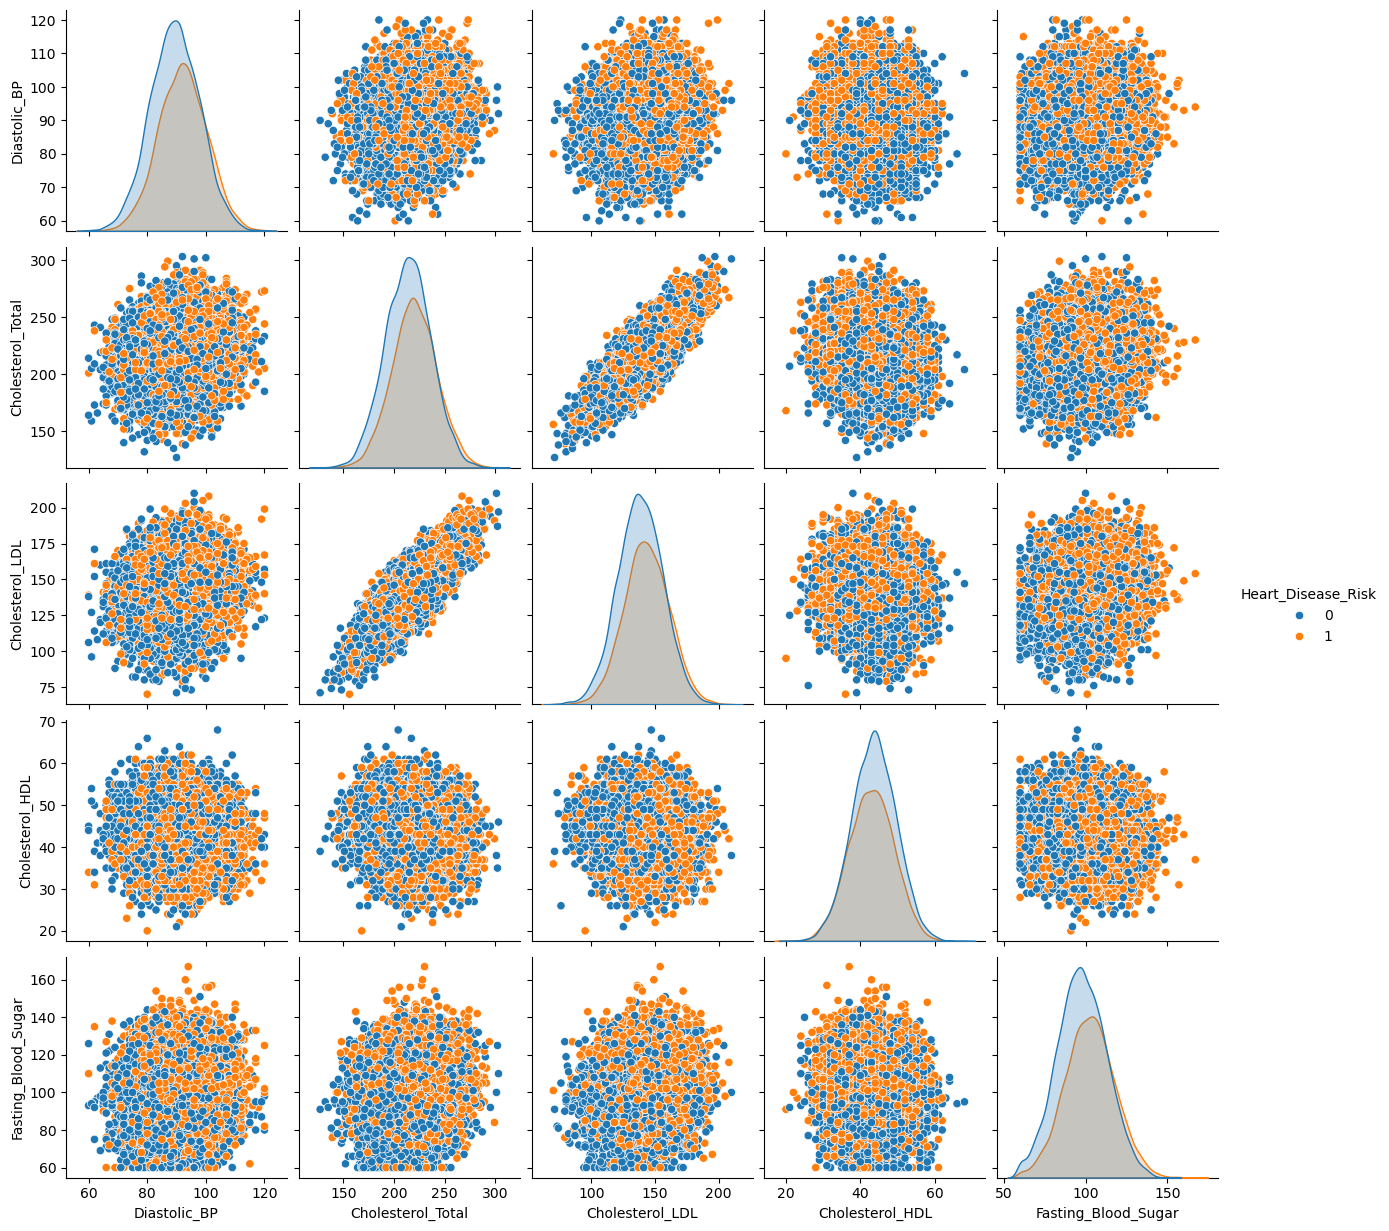

In [ ]:
list_cols = numeric_cols[5:10] + ['Heart_Disease_Risk']
sns.pairplot(df[list_cols], hue = 'Heart_Disease_Risk')
plt.show()

**Commentaire** : Pour certaines variables quantitatives, les distributions sont légèrement différentes losque le risque de maladie cardiovasculaire est présent.

In [101]:
# Test de Mann-Whitney U pour comparer les distributions d'une entre les deux groupes

from scipy.stats import mannwhitneyu
var = 'Fasting_Blood_Sugar'
df0 = df[df['Heart_Disease_Risk'] == 0][var]
df1 = df[df['Heart_Disease_Risk'] == 1][var]
stat, p = mannwhitneyu(df0.values, df1.values, alternative='less')

print("Statistic:", stat)
print("p-value:", p)

Statistic: 22639416.5
p-value: 1.0434733098769333e-81


## Bar chart

In [51]:
categorical_df.describe()

Gender  Smoking_Status  Alcohol_Consumption  Physical_Activity_Level  \
count    15000           15000                15000                    15000   
unique       2               2                    3                        4   
top          0               0                    0                        1   
freq      7622           10495                 7502                     6009   

        Family_History  Heart_Disease_Risk  
count            15000               15000  
unique               2                   2  
top                  0                   0  
freq             12757                8460

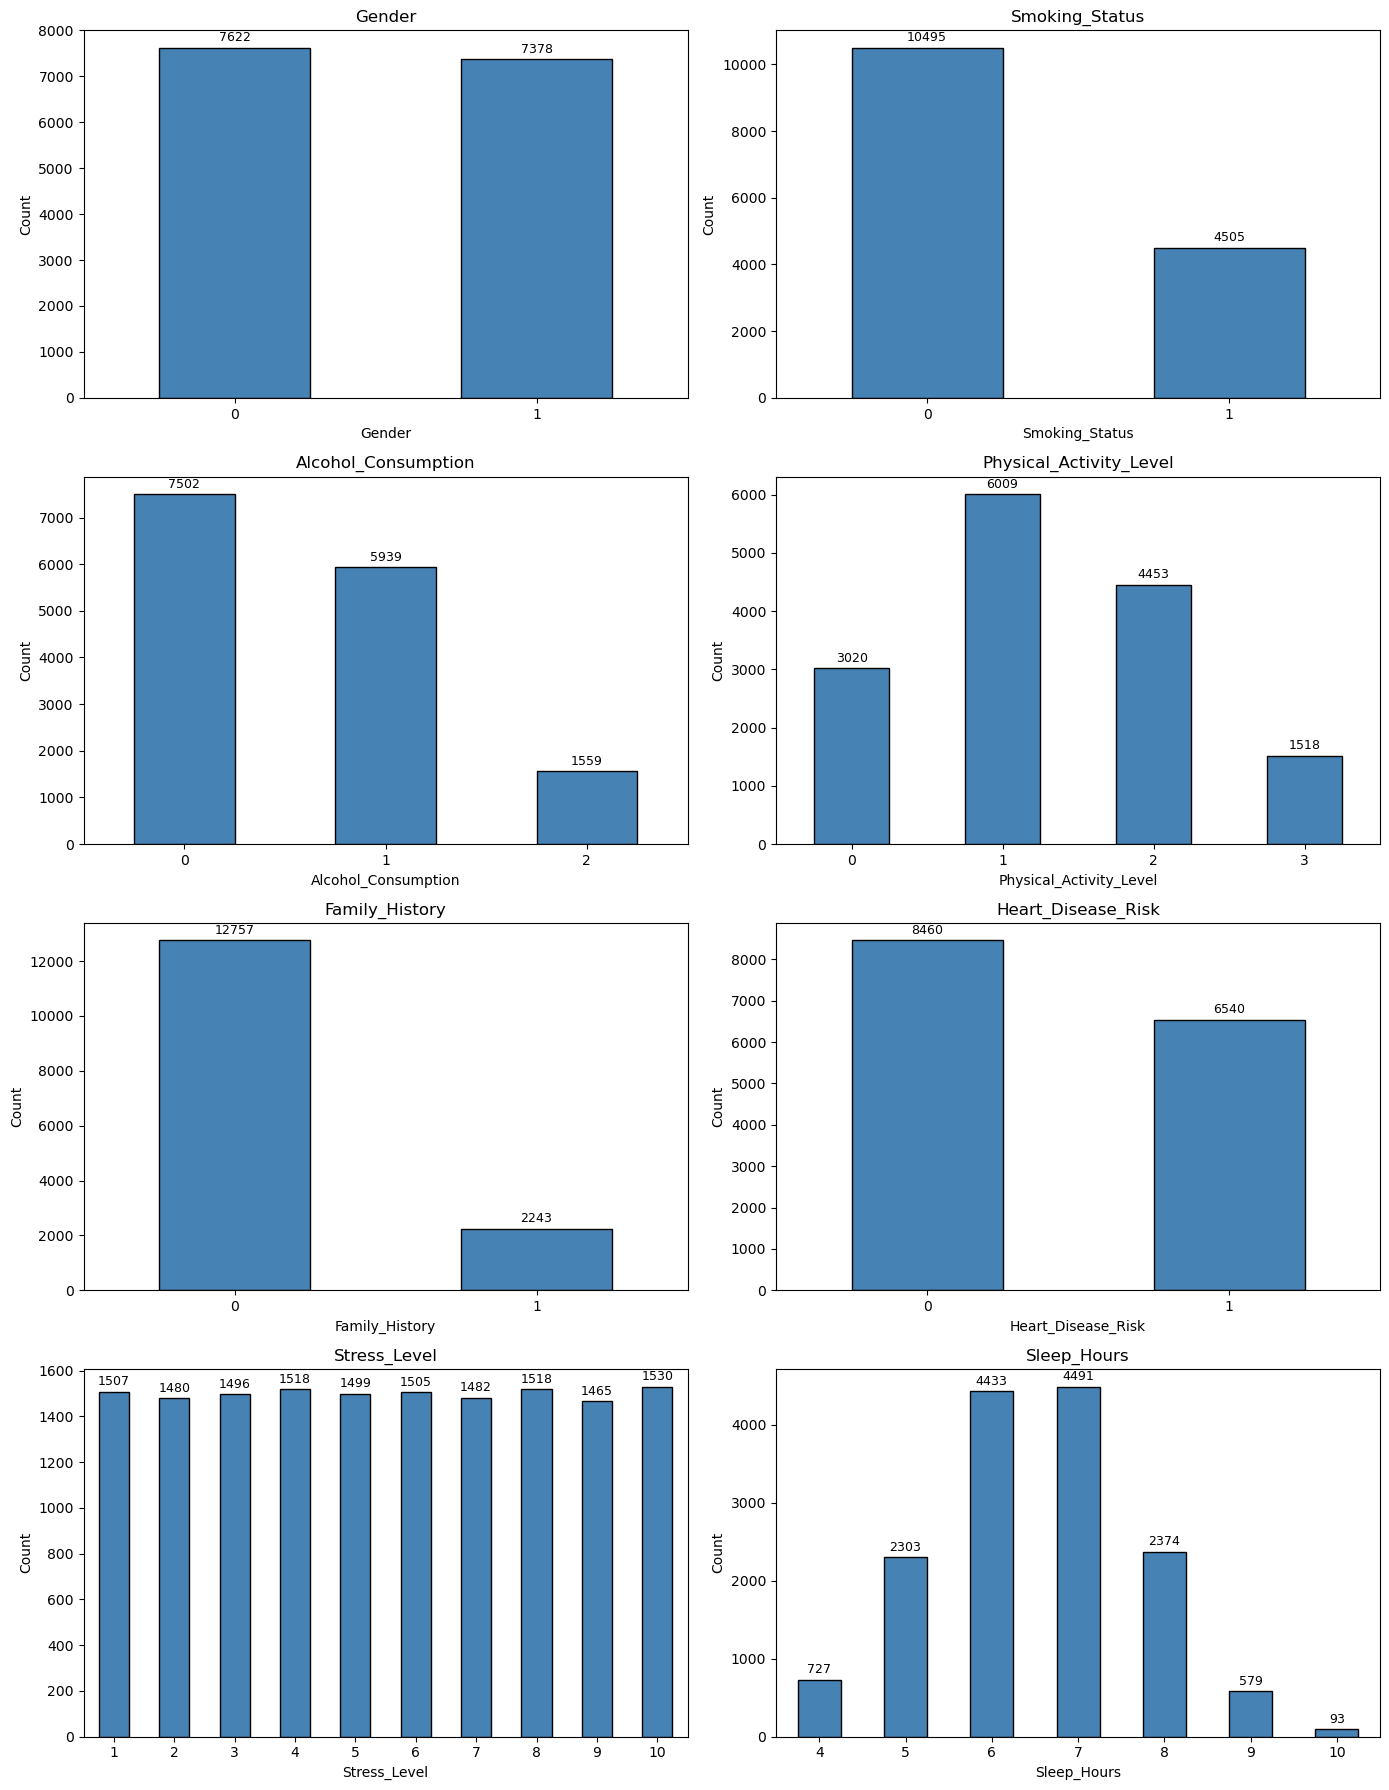

In [75]:
# Plot bar plots for all categorical variables
n_plots = len(categorical_cols) + 2

fig, axes = plt.subplots((n_plots + 1) // 2, 2, figsize=(14, 18))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols + numeric_cols[-2:]):
    
    counts = df[col].value_counts().sort_index()
    
    ax = counts.plot(
        kind='bar',
        ax=axes[idx],
        color='steelblue',
        edgecolor='black'
    )
    
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', labelrotation=0)

    # 🔹 Add count labels on top
    for i, value in enumerate(counts):
        axes[idx].text(
            i,                      # x position
            value + max(counts)*0.01,  # slightly above bar
            str(value),
            ha='center',
            va='bottom',
            fontsize=9
        )

# Remove extra subplots
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


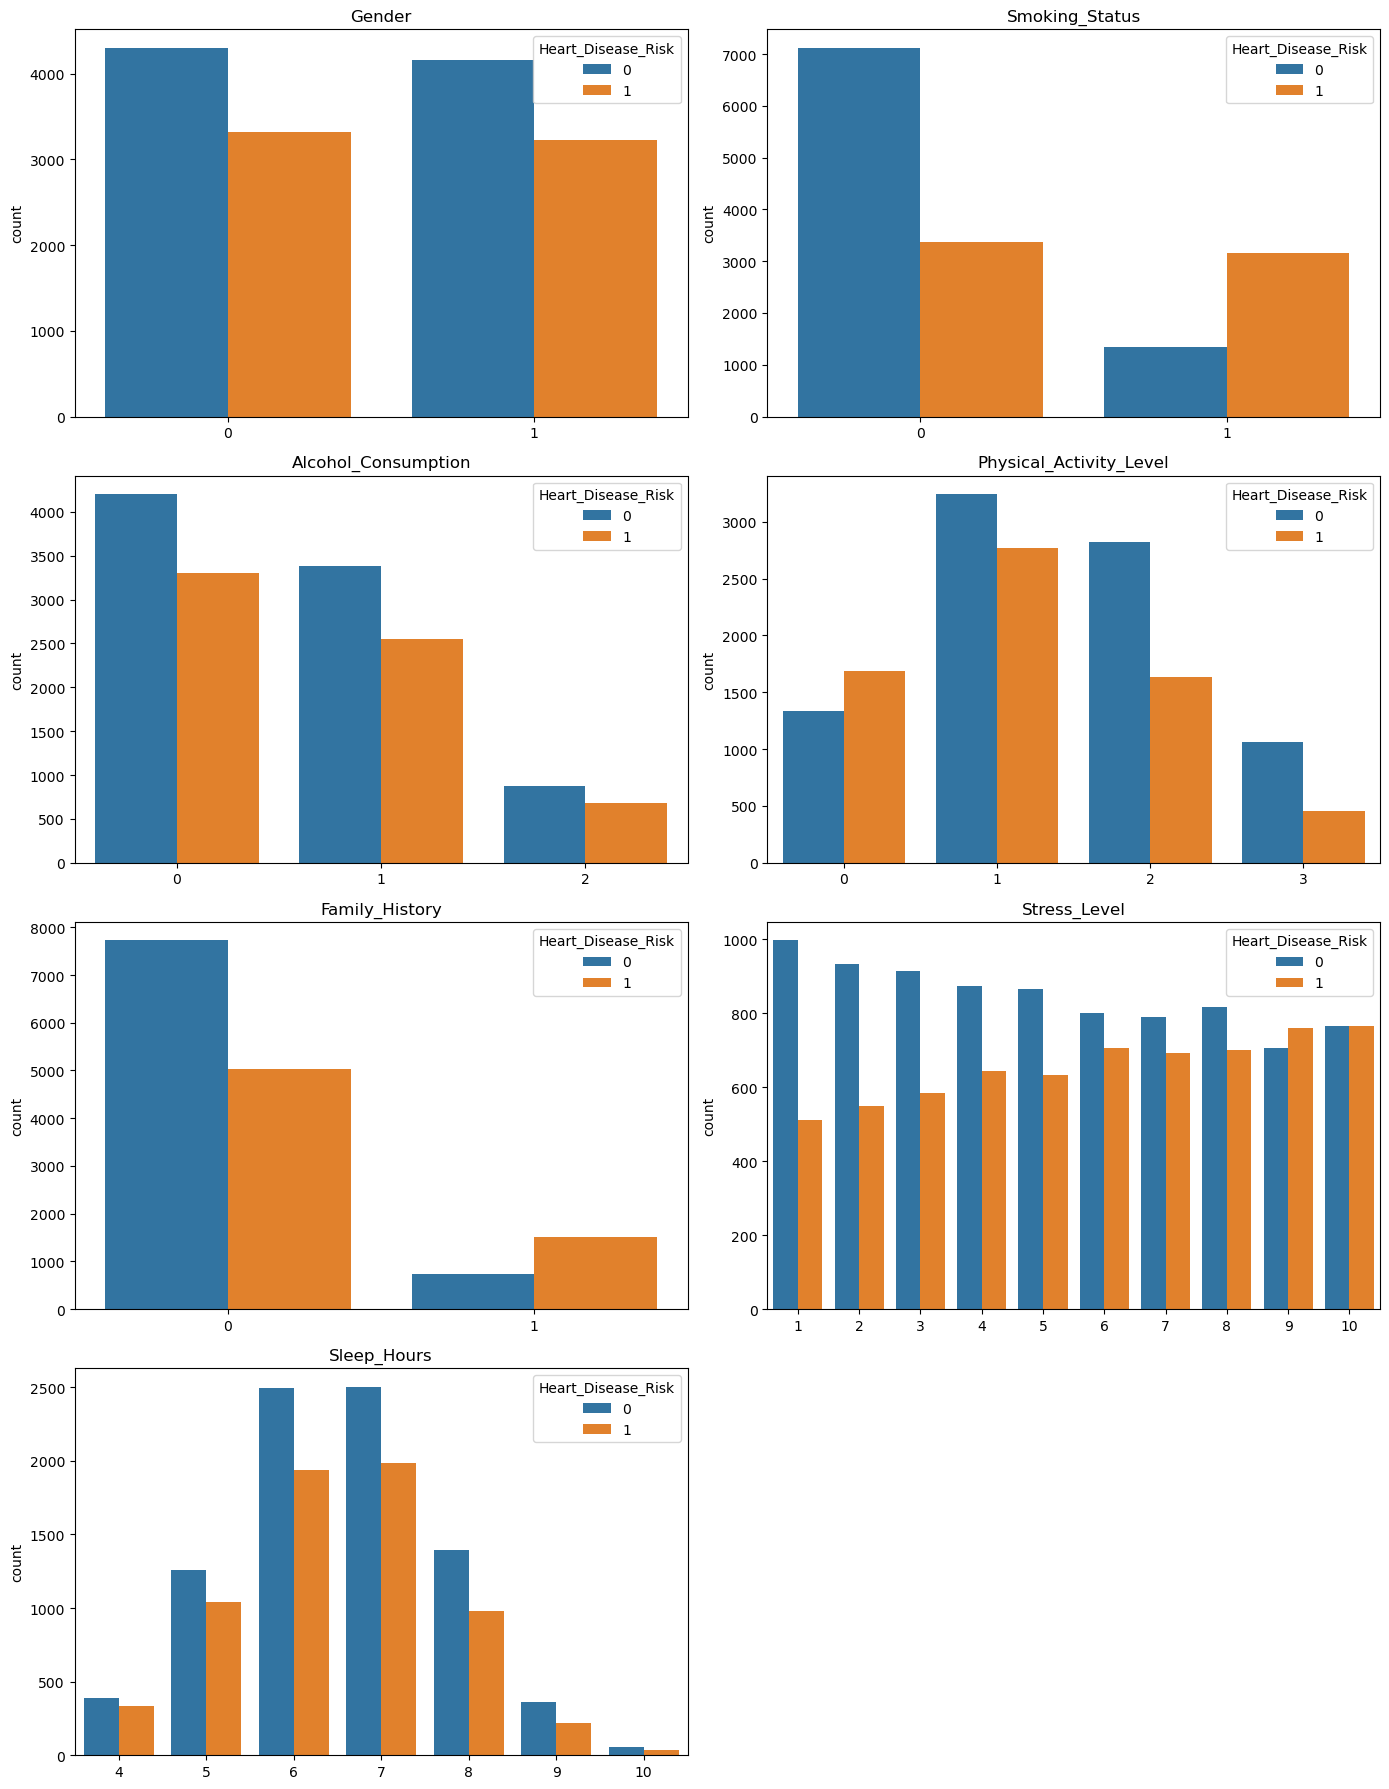

In [97]:
# Plot bar plots for all categorical variables with hue = 'Heart_Disease_Risk'

n_plots = len(categorical_cols) + 1

fig, axes = plt.subplots((n_plots + 1) // 2, 2, figsize=(14, 18))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols[:-1] + numeric_cols[-2:]):
    sns.countplot(
        data=df,
        x=col,
        hue='Heart_Disease_Risk',
        order=sorted(df[col].unique()),   # ensures numeric order
        ax=axes[idx]
    )
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel("")
    axes[idx].tick_params(axis='x', labelrotation=0)

# Remove extra subplots
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


**Commentaire** : Smoking status, Physical Activity Level, Family History et Stress Level semblent avoir des associations plus fortes avec le risque de maladie cardiovasculaire. Pour vérifier on peut utiliser le test d'indépendance de chi2

In [100]:
from scipy.stats import chi2_contingency
var = 'Physical_Activity_Level'
tab = pd.crosstab(df[var], df['Heart_Disease_Risk'])
stat, p, dof, expected = chi2_contingency(tab)
print("Chi2 Statistic:", stat)
print("p-value:", p)
print(tab)

Chi2 Statistic: 398.84946676045263
p-value: 3.92977883911176e-86
Heart_Disease_Risk          0     1
Physical_Activity_Level            
0                        1334  1686
1                        3244  2765
2                        2819  1634
3                        1063   455


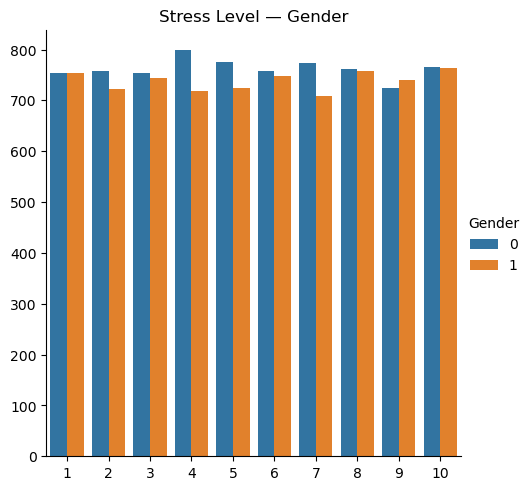

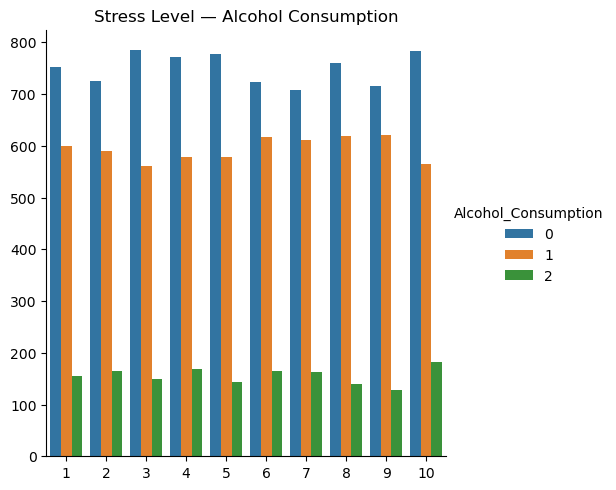

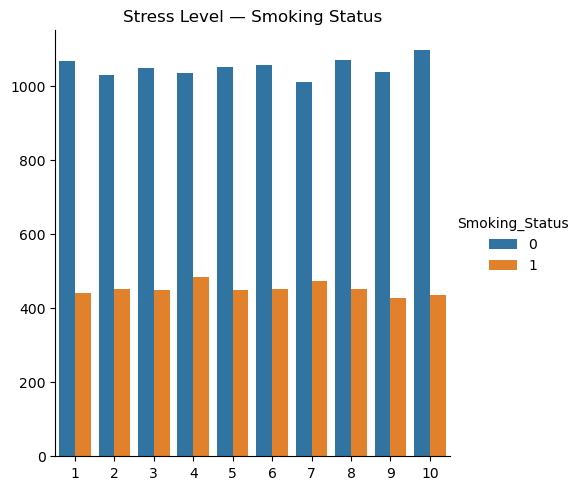

In [96]:
fig = sns.catplot(data=df, x='Stress_Level', kind='count', hue = 'Gender')
plt.xlabel('')
plt.ylabel('')
plt.title('Stress Level — Gender')
plt.show()

fig = sns.catplot(data=df, x='Stress_Level', kind='count', hue = 'Alcohol_Consumption')
plt.xlabel('')
plt.ylabel('')
plt.title('Stress Level — Alcohol Consumption')
plt.show()

fig = sns.catplot(data=df, x='Stress_Level', kind='count', hue = 'Smoking_Status')
plt.xlabel('')
plt.ylabel('')
plt.title('Stress Level — Smoking Status')
plt.show()

# PCA

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [105]:
data_pca = numeric_df.iloc[:, :-2]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)
pca = PCA()
respca = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29185589, 0.20370259, 0.14801625, 0.10567286, 0.09072045,
       0.06866127, 0.05561643, 0.01888606, 0.01644633, 0.00042187])

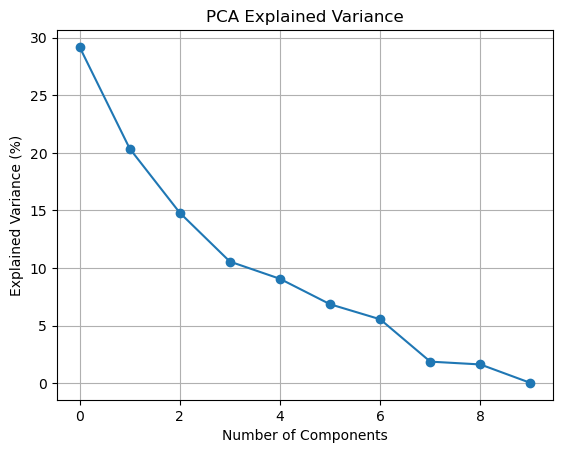

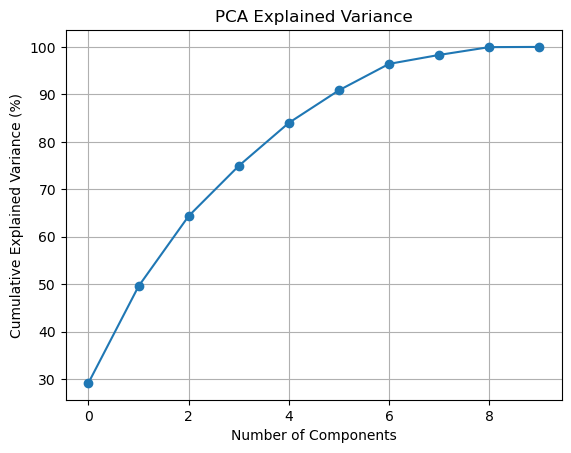

In [111]:
plt.plot(pca.explained_variance_ratio_ * 100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

plt.plot(pca.explained_variance_ratio_.cumsum() * 100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [134]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=numeric_cols[:-2]
)

print(loadings)

                          PC1       PC2       PC3       PC4       PC5  \
Age                  0.305307 -0.346085 -0.012870  0.166185  0.298107   
Height_cm            0.147962  0.392661  0.029240  0.614245  0.417946   
Weight_kg            0.379425  0.497970  0.021695 -0.009095 -0.039389   
BMI                  0.361637  0.327521  0.005156 -0.465526 -0.358621   
Systolic_BP          0.363848 -0.253034  0.494732  0.060620 -0.084819   
Diastolic_BP         0.335036 -0.246370  0.522305  0.074494 -0.107738   
Cholesterol_Total    0.387055 -0.231519 -0.478882  0.071427 -0.081206   
Cholesterol_LDL      0.359256 -0.232086 -0.501519  0.086480 -0.096449   
Cholesterol_HDL     -0.237918 -0.372274  0.004830 -0.109936  0.025761   
Fasting_Blood_Sugar  0.173304 -0.004594  0.006843 -0.586854  0.755600   

                          PC6       PC7       PC8       PC9      PC10  
Age                 -0.223421  0.778648 -0.070053 -0.096149 -0.000217  
Height_cm            0.291815 -0.088351  0.008189  0

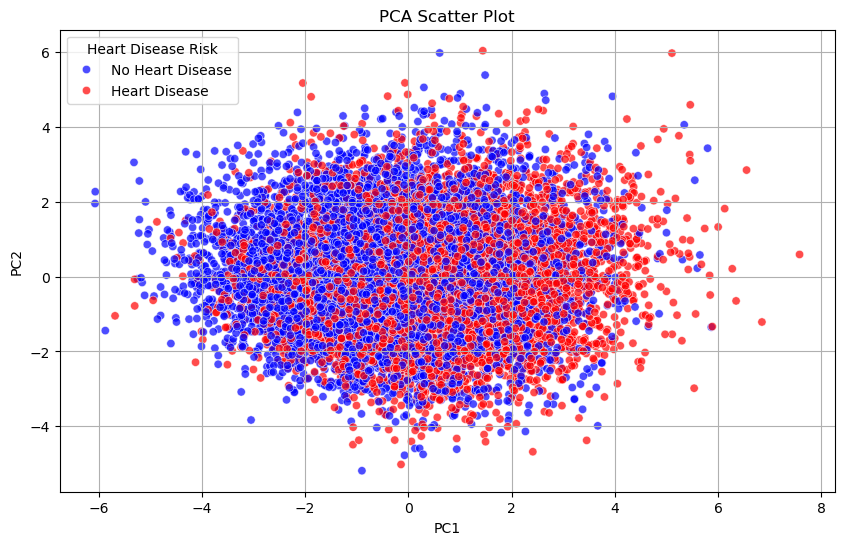

In [131]:
pca_df = pd.DataFrame({
    "PC1": respca[:, 0],
    "PC2": respca[:, 1],
    "Heart_Disease_Risk": df["Heart_Disease_Risk"].astype(int)  # ensure 0/1 int
})

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Heart_Disease_Risk",
    hue_order=[0, 1],
    palette=['blue', 'red'],   # positional mapping: 0->blue, 1->red
    alpha=0.7,
    legend='full'
)

handles, labels = ax.get_legend_handles_labels()
if labels and labels[0] == "Heart_Disease_Risk":
    handles, labels = handles[1:], labels[1:]

ax.legend(handles=handles,
          labels=["No Heart Disease", "Heart Disease"],
          title="Heart Disease Risk")

ax.grid(True)
ax.set_title("PCA Scatter Plot")
plt.show()
